In [1]:
import os
os.chdir('..')

In [2]:
from _assets.modules import *
from _assets.config_dirs_jupyter import *


# OS 화일 및 DF 정보조회를 위한 탐색 모듈


# FOR Jupyter Notebook - 화일분석에 필요한 공동폴더를 등록합니다.
# - echo = True : SYS.PATH INSERT 상황 보여줌



In [7]:
raw      = 'kag02_bicycle_demand/data_raw/'
remake   = 'kag02_bicycle_demand/data_remake/'
submit   = 'kag02_bicycle_demand/data_submit/'

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [9]:
show_ls(dir_base + remake)

False
DIR_TARGET=C:\Users\nitt0\Documents\Github\dacon_competition_2020\c03_starcraft_prediction\data_remake
C:\Users\nitt0\Documents\Github\dacon_competition_2020\kag02_bicycle_demand/data_remake/
----------------------------------------
  01. test_EDA.csv
  02. test_dummy_EDA.csv
  03. test_train_EDA.csv
  04. train_EDA.csv
  05. train_dummy_EDA.csv
  06. train_log_EDA.csv


In [10]:
train_dummy = pd.read_csv(dir_base + remake + "train_dummy_EDA.csv")
train = pd.read_csv(dir_base + remake + "train_EDA.csv")
train_log = pd.read_csv(dir_base + remake + "train_log_EDA.csv")
test_dummy = pd.read_csv(dir_base + remake + "test_dummy_EDA.csv")

In [11]:
train_dummy.loc[:,"count"] = np.log(train_dummy.loc[:,"count"])

train_Y = train_dummy.loc[:,"count"]
train_X = train_dummy.loc[:, train_dummy.columns != "count"]

In [28]:
train_Y.shape   # (10886,)
train_X.shape   # (10886, 49)
train_X.columns

Index(['windspeed', 'humidity', 'temp', 'season_1', 'season_2', 'season_3',
       'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4',
       'year_2011', 'year_2012', 'month_1', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23'],
      dtype='object')

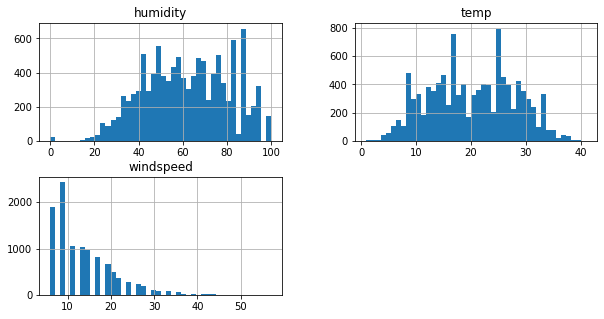

In [75]:
bins=44
train_X[train_X.columns[:3]].hist(bins=bins, figsize=(10,5))
plt.show()

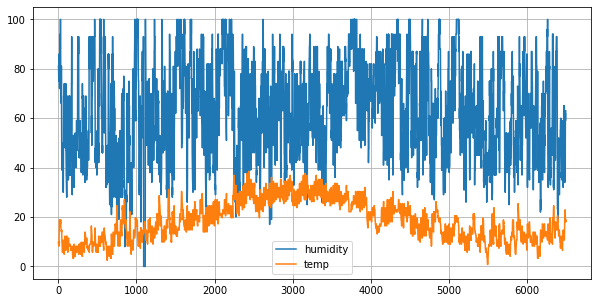

In [78]:
train_X[['humidity', 'temp']][:6500].plot(figsize=(10,5), grid=True)
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

lrm = LinearRegression()
lrm.fit(train_X, train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
from sklearn.metrics import mean_squared_error

pred = lrm.predict(train_X)
pred = np.exp(pred)
lrm_rmse = mean_squared_error(pred, np.exp(train_Y))
lrm_rmse = np.sqrt(lrm_rmse)

In [14]:
lrm_rmse

94.49344071070217

In [15]:
lrm.coef_ # categorical의 coefficient가 다 10000이 넘음,,,

array([-5.71721249e-03, -3.09045549e-03,  2.73056464e-02, -1.01627522e+11,
       -8.16034524e+10, -1.01553378e+11, -7.47058020e+10, -1.63701572e+10,
       -1.63701572e+10, -1.63701572e+10, -1.63701572e+10,  1.05221212e+10,
        1.05221212e+10,  1.11911297e+10,  1.11911297e+10,  1.11911297e+10,
       -8.83293981e+09, -8.83293981e+09, -8.83293981e+09,  1.11169862e+10,
        1.11169862e+10,  1.11169862e+10, -1.57305902e+10, -1.57305902e+10,
       -1.57305902e+10,  1.05703532e+10,  1.05703532e+10,  1.05703532e+10,
        1.05703532e+10,  1.05703532e+10,  1.05703532e+10,  1.05703532e+10,
        1.05703532e+10,  1.05703532e+10,  1.05703532e+10,  1.05703532e+10,
        1.05703532e+10,  1.05703532e+10,  1.05703532e+10,  1.05703532e+10,
        1.05703532e+10,  1.05703532e+10,  1.05703532e+10,  1.05703532e+10,
        1.05703532e+10,  1.05703532e+10,  1.05703532e+10,  1.05703532e+10,
        1.05703532e+10])

In [16]:
subs = lrm.predict(test_dummy)

In [17]:
mask = subs > 10000

In [18]:
subs[mask] = 7

In [19]:
submissions = pd.read_csv(dir_base + submit + "sampleSubmission.csv")

In [20]:
submissions["count"] = subs

In [21]:
submissions["count"] = np.exp(submissions["count"])

In [22]:
submissions.to_csv(dir_base + submit + "subs.csv", index=False)

In [23]:
np.sum(submissions["count"] > 5000)

0